In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mcdonalds-data/mcdonalds.csv


In [2]:
# Importing the csv file
df = pd.read_csv('/kaggle/input/mcdonalds-data/mcdonalds.csv', index_col=False)

In [3]:
# Printing the names of the columns
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [4]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [5]:
# This line of code selects the binary columns (Yes or No)
df_attr = df.loc[:, 'yummy':'disgusting']
# Ensuring we have all the columns required
df_attr.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [6]:
# Encoding the variables 
df_attr = df_attr.applymap({"Yes": 1, "No": 0}.get)
df_attr.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [7]:
# Extracting the required imformation like mean,median,standard deviation all rounded to 2 decimal points
df_attr.describe().applymap(lambda x: f"{x:0.2f}")

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
count,1453.00,1453.00,1453.00,1453.00,1453.00,1453.00,1453.00,1453.00,1453.00,1453.00,1453.00
mean,0.55,0.91,0.09,0.87,0.53,0.90,0.60,0.64,0.36,0.20,0.24
std,0.50,0.29,0.29,0.34,0.50,0.30,0.49,0.48,0.48,0.40,0.43
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00
75%,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [8]:
from sklearn.decomposition import PCA

In [9]:
# Using Principal Component Analysis to extract required information 
pca = PCA(n_components=11)
pca.fit(df_attr)

PCA(n_components=11)

In [10]:
# Conversion of PCA data into dataframe
df_pca = pd.DataFrame(pca.components_.T, columns = [i for i in range(1, 12)], index = df_attr.columns)
df_pca.applymap(lambda x: f"{x:0.2f}")

,1,2,3,4,5,6,7,8,9,10,11
yummy,-0.48,0.36,-0.30,0.06,-0.31,0.17,-0.28,0.01,0.57,-0.11,0.05
convenient,-0.16,0.02,-0.06,-0.14,0.28,-0.35,-0.06,-0.11,-0.02,-0.67,-0.54
spicy,-0.01,0.02,-0.04,0.20,0.07,-0.36,0.71,0.38,0.40,-0.08,0.14
fattening,0.12,-0.03,-0.32,-0.35,-0.07,-0.41,-0.39,0.59,-0.16,-0.01,0.25
greasy,0.30,-0.06,-0.80,0.25,0.36,0.21,0.04,-0.14,-0.00,0.01,0.00
fast,-0.11,-0.09,-0.06,-0.10,0.11,-0.59,-0.09,-0.63,0.17,0.24,0.34
cheap,-0.34,-0.61,-0.15,0.12,-0.13,-0.10,-0.04,0.14,0.08,0.43,-0.49
tasty,-0.47,0.31,-0.29,-0.00,-0.21,-0.08,0.36,-0.07,-0.64,0.08,0.02
expensive,0.33,0.60,0.02,0.07,-0.00,-0.26,-0.07,0.03,0.07,0.45,-0.49
healthy,-0.21,0.08,0.19,0.76,0.29,-0.18,-0.35,0.18,-0.19,-0.04,0.16


In [11]:
df_pca.describe().applymap(lambda x: f"{x:0.2f}")

,1,2,3,4,5,6,7,8,9,10,11
count,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00
mean,-0.06,0.04,-0.17,0.11,-0.03,-0.20,-0.02,0.02,0.02,0.00,-0.06
std,0.31,0.31,0.26,0.29,0.31,0.24,0.32,0.32,0.32,0.32,0.31
min,-0.48,-0.61,-0.80,-0.35,-0.73,-0.59,-0.39,-0.63,-0.64,-0.67,-0.54
25%,-0.28,-0.08,-0.30,-0.05,-0.17,-0.35,-0.18,-0.13,-0.12,-0.09,-0.26
50%,-0.11,0.02,-0.09,0.07,-0.00,-0.21,-0.06,0.01,-0.00,-0.01,0.02
75%,0.21,0.19,-0.05,0.23,0.19,-0.09,0.00,0.16,0.12,0.16,0.15
max,0.37,0.60,0.19,0.76,0.36,0.21,0.71,0.59,0.57,0.45,0.34


In [12]:
# Standard Deviation of each component
pca.explained_variance_

array([0.57312398, 0.36900226, 0.2546408 , 0.15904032, 0.11384214,
       0.09627033, 0.08392454, 0.07569209, 0.07035814, 0.06192225,
       0.05612296])

In [13]:
# Proportion of Variation
pca.explained_variance_ratio_

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [14]:
col_names = [f"PC-{i}" for i in range(1,12)]
row_names = ["Standard Deviation", "Proportion of Variance", "Cumilative Proportion"]
data = [pca.explained_variance_, pca.explained_variance_ratio_, np.cumsum(pca.explained_variance_ratio_)]

In [15]:
df_summary = pd.DataFrame(data, row_names, col_names)
df_summary = df_summary.applymap(lambda x: f"{x:0.2f}")
df_summary

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,PC-11
Standard Deviation,0.57,0.37,0.25,0.16,0.11,0.10,0.08,0.08,0.07,0.06,0.06
Proportion of Variance,0.30,0.19,0.13,0.08,0.06,0.05,0.04,0.04,0.04,0.03,0.03
Cumilative Proportion,0.30,0.49,0.63,0.71,0.77,0.82,0.86,0.90,0.94,0.97,1.00


In [16]:
import plotly.express as px

In [17]:
# Extracting the loadings of each component
components = pca.fit_transform(df_attr)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

In [18]:
fig = px.scatter(components, x=0, y=1, labels={"0": "PC-1", "1":"PC-2"})

In [19]:
# Adding the variables to the plot using the loadings
for i, feature in enumerate(list(df_attr.columns)):
    fig.add_annotation(
        ax=0, ay=0,
        axref="x", ayref="y",
        x=loadings[i, 0],
        y=loadings[i, 1],
        showarrow=True,
        arrowsize=2,
        arrowhead=2,
        xanchor="right",
        yanchor="top"
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
        yshift=5,
    )
fig.show()

**K Means Clustering**

In [20]:
from sklearn.cluster import KMeans

In [21]:
df_pca.columns

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [22]:
# Running KMeans on different number of clusters
sse = []
for i in range(1, 9):
    km = KMeans(n_clusters=i, n_init = 10)
    km.fit(df_attr)
    sse.append(km.inertia_)

In [23]:
df_km = pd.DataFrame({'I': [i for i in range(1,9)], 'WCSS': sse})

In [24]:
# Plotting the within cluster sum of square for each k
fig2 = px.line(df_km, x="I", y="WCSS")
fig2.show()

In [25]:
# we observe using the elbow method on the above plot that 4 clusters will be optimum
km = KMeans(n_clusters = 4, n_init = 10)

In [26]:
# Using only 2 components to plot the clusters on the graph. 
df_km4 = PCA(n_components=2).fit_transform(df_attr)
df_km4.shape

(1453, 2)

In [27]:
# Predicting the clusters
y_predicted = km.fit_predict(df_km4)

In [28]:
y_predicted.shape

(1453,)

In [29]:
y_predicted

array([2, 3, 3, ..., 3, 1, 0], dtype=int32)

In [30]:
df_km4.shape

(1453, 2)

In [31]:
# Scatter plot where the colours are determined by the cluster number
fig3 = px.scatter(df_km4, x=0, y=1, color=y_predicted)

In [32]:
fig3.show()

**Mixture of Distributions**

In [33]:
from sklearn.mixture import GaussianMixture

In [34]:
# Using various values to determine the optimum number of components to be used in the gaussian mixture
aic = []
bic = []
icl = []
loglikli = []
converged = []
maxiter = []
for i in range(2, 9):
    gm = GaussianMixture(n_components = i, n_init = 10)
    gm.fit(df_attr)
    aic.append(gm.aic(df_attr))
    bic_score = gm.bic(df_attr)
    bic.append(bic_score)
    converged.append(gm.converged_)
    maxiter.append(gm.n_iter_)
    log_likelihoods = gm.score_samples(df_attr)
    icl_score = np.sum(log_likelihoods - 0.5 * bic_score)
    icl.append(icl_score)
    loglikli.append(gm.score(df_attr))

In [35]:
df_gmm = pd.DataFrame({'Components': [i for i in range(2,9)], 'aic': aic, 'bic': bic, 'icl': icl, 'converged': converged, 'logLik': loglikli, 'iter': maxiter})

In [36]:
# we observe from the values that GMM suggests only 2 components (Lower the -aic and -bic the better)
df_gmm.head(8)

,Components,aic,bic,icl,converged,logLik,iter
0,2,-14834.648124,-14016.033346,1.019022e+07,True,5.211510,6
1,3,-29807.835653,-28577.272793,2.077653e+07,True,10.417700,6
2,4,-41916.380137,-40273.869196,2.928024e+07,True,14.638121,7
3,5,-52440.806243,-50386.347220,3.663229e+07,True,18.313423,10
4,6,-49167.658489,-46701.251384,3.395351e+07,True,17.240763,10
5,7,-52344.256463,-49465.901277,3.596369e+07,True,18.387562,11
6,8,-51242.440827,-47952.137559,3.486347e+07,True,18.062093,9


In [37]:
df_attr.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


**Mixture of Regressions**

In [38]:
import statsmodels.api as sm

In [39]:
# Ensuring that the like columns only contain integers
def clean_like(s):
    try:
        return int(s)
    except ValueError:
        if 'hate' in s:
            return -5
        else:
            return 5

In [40]:
df['Like'] = df['Like'].map(clean_like)

In [41]:
df_attr['Like_n'] = df['Like']

In [42]:
print(df_attr['Like_n'].value_counts())

Like_n
 3    229
 2    187
 0    169
 4    160
 1    152
-5    152
 5    143
-3     73
-4     71
-2     59
-1     58
Name: count, dtype: int64


In [43]:
# Defining the formula to be used for OLS Regression
formula = "Like_n ~ " + " + ".join(df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']])

In [44]:
# Fitting the model
model = sm.OLS.from_formula(formula, data=df_attr)
result = model.fit()

In [45]:
# Printing the summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Like_n   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     216.9
Date:                Sun, 24 Dec 2023   Prob (F-statistic):          4.03e-296
Time:                        10:22:08   Log-Likelihood:                -3003.4
No. Observations:                1453   AIC:                             6031.
Df Residuals:                    1441   BIC:                             6094.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9242      0.280     -6.884      0.0

In [46]:
df_attr['Cluster'] = y_predicted

In [47]:
df_attr.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like_n,Cluster
0,0,1,0,1,0,1,1,0,1,0,0,-3,2
1,1,1,0,1,1,1,1,1,1,0,0,2,3
2,0,1,1,1,1,1,0,1,1,1,0,1,3
3,1,1,0,1,1,1,1,1,0,0,1,4,1
4,0,1,0,1,1,1,1,0,0,1,0,2,2


In [48]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [49]:
df_attr = df_attr.drop(['Like_n', 'Cluster'], axis=1)

In [50]:
import matplotlib.pyplot as plt

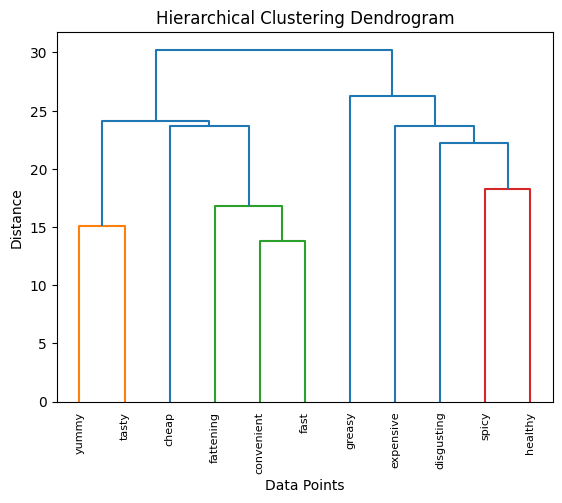

In [51]:
# Constructing a dendogram using the attributes to get the similarity of the variables
dig = linkage(df_attr.T, method='average', metric='euclidean')
dendrogram(dig, labels=df_attr.columns, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [52]:
# Adding the variables to the cluster prediction plot
for i, feature in enumerate(list(df_attr.columns)):
    fig3.add_annotation(
        ax=0, ay=0,
        axref="x", ayref="y",
        x=loadings[i, 0],
        y=loadings[i, 1],
        showarrow=True,
        arrowsize=2,
        arrowhead=2,
        xanchor="right",
        yanchor="top"
    )
    fig3.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
        yshift=5,
    )
fig3.show()

**Describing Segments**

In [53]:
df_mosaic = pd.DataFrame({'Cluster': y_predicted})
df_mosaic['Like'] = df['Like']

In [54]:
df_mosaic.head()

,Cluster,Like
0,2,-3
1,3,2
2,3,1
3,1,4
4,2,2


In [55]:
import seaborn as sns

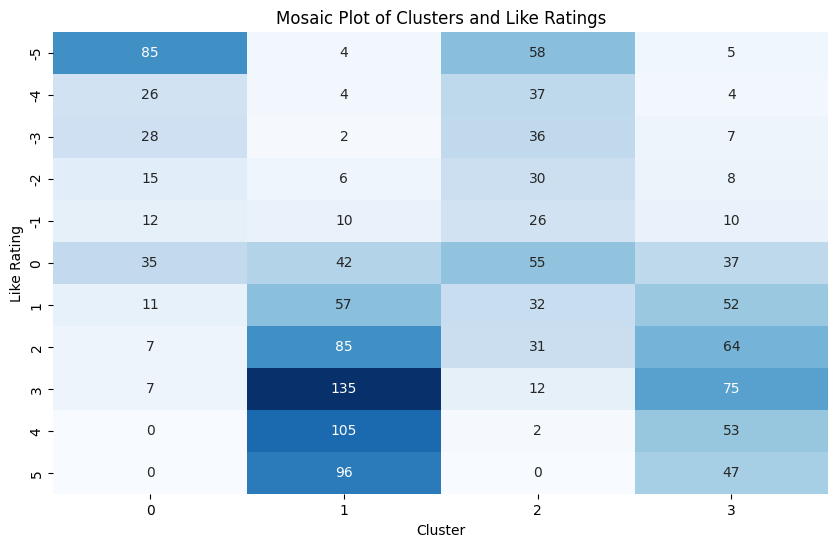

In [56]:
# Constructing a mosaic plot to get the counts of each rating in each cluster
plt.figure(figsize=(10, 6))
mosaic_data = pd.crosstab(df_mosaic['Like'], df_mosaic['Cluster'])
sns.heatmap(mosaic_data, cmap='Blues', annot=True, fmt='d', cbar=False)
plt.title('Mosaic Plot of Clusters and Like Ratings')
plt.ylabel('Like Rating')
plt.xlabel('Cluster')
plt.show()

In [57]:
df_mosaic['Age'] = df['Age']
df_mosaic['Gender'] = df['Gender']

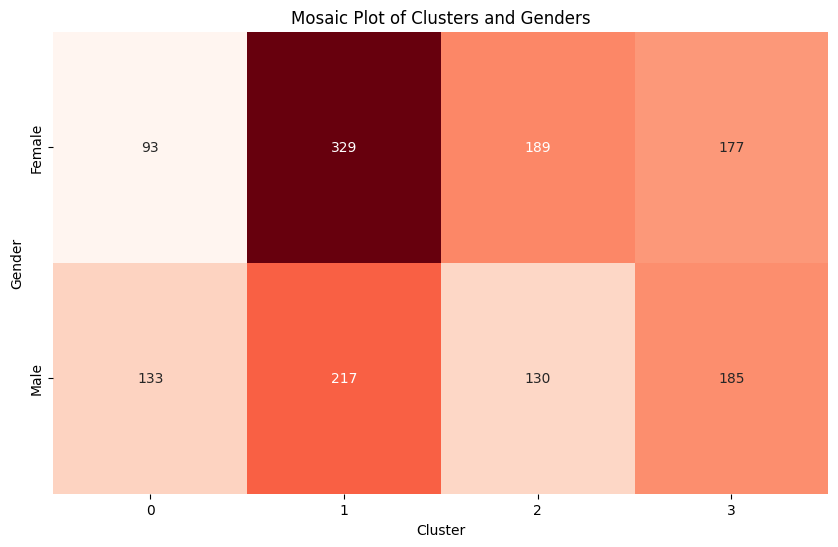

In [58]:
# Getting the mosaic plot between gender and cluster to get the count of each gender in each cluster
plt.figure(figsize=(10, 6))
mosaic_data = pd.crosstab(df_mosaic['Gender'], df_mosaic['Cluster'])
sns.heatmap(mosaic_data, cmap='Reds', annot=True, fmt='d', cbar=False)
plt.title('Mosaic Plot of Clusters and Genders')
plt.ylabel('Gender')
plt.xlabel('Cluster')
plt.show()

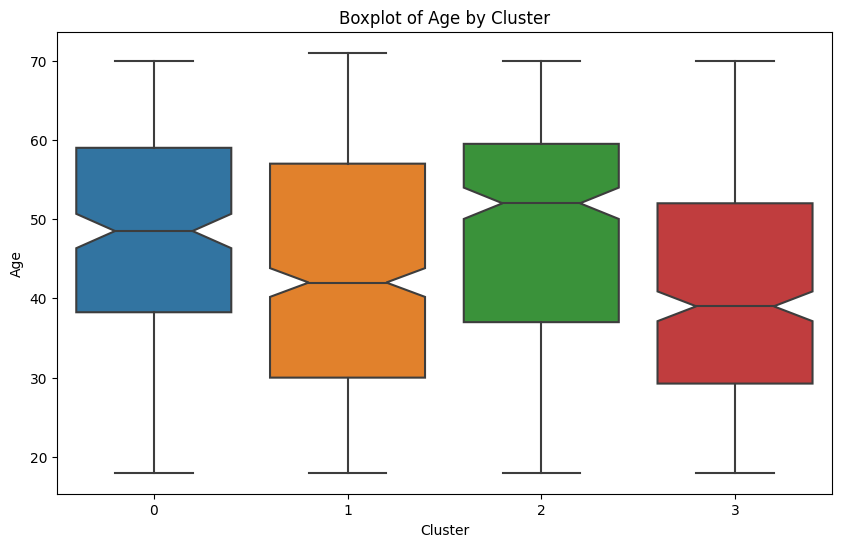

In [59]:
# Getting the box plot for age in each cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Age', data=df_mosaic, width=0.8, notch=True)
plt.title('Boxplot of Age by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

**Selecting Target Segments**

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder

In [61]:
# Encoding visit frequency
conversion_dict = {
    'Every three months': 0,
    'Once a week': 1,
    'Once a month': 2,
    'Once a year': 3,
    'More than once a week': 4,
    'Never': 5
}

In [62]:
# Encoding Gender
gender_conv = {
    'Male': 0,
    'Female': 1
}

In [63]:
df_mosaic['VisitFrequency'] = df['VisitFrequency'].map(conversion_dict)
df_mosaic['Gender'] = df_mosaic['Gender'].map(gender_conv)

In [64]:
df_mosaic['VisitFrequency'].unique()

array([0, 1, 2, 3, 4, 5])

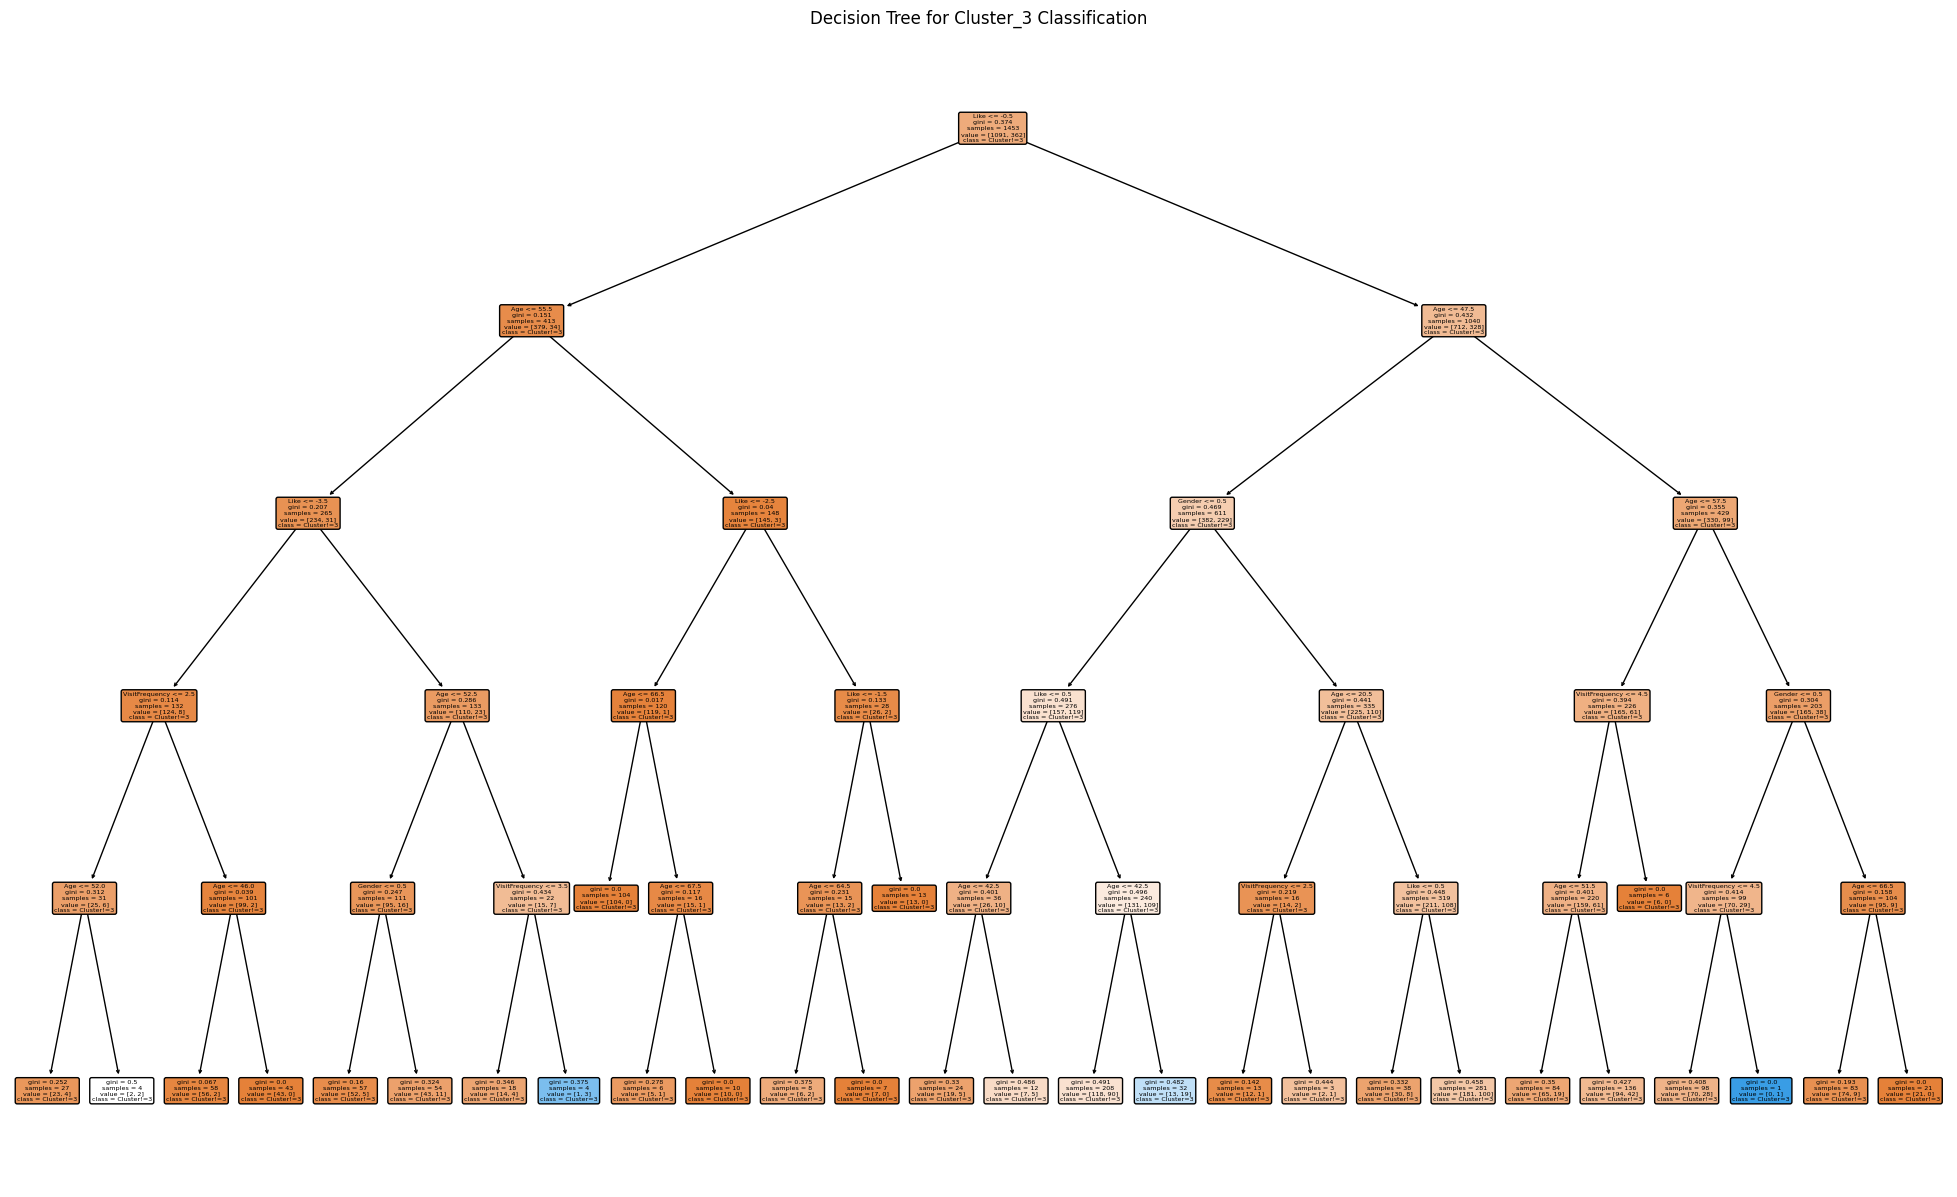

In [65]:
# Constructing decision tree for cluster 3 assignment
df_mosaic['Cluster_3'] = (df_mosaic['Cluster'] == 3).astype(int)

# Select relevant features for the model
features = ['Like', 'Age', 'VisitFrequency', 'Gender']

# Split the data into training and testing sets
X, y = df_mosaic[features], df_mosaic['Cluster_3']

# Create a decision tree model
tree_model = DecisionTreeClassifier(random_state=1234, max_depth=5)
tree_model.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(25, 15))
plot_tree(tree_model, feature_names=features, class_names=['Cluster!=3', 'Cluster=3'], filled=True, rounded=True)
plt.title('Decision Tree for Cluster_3 Classification')
plt.show()

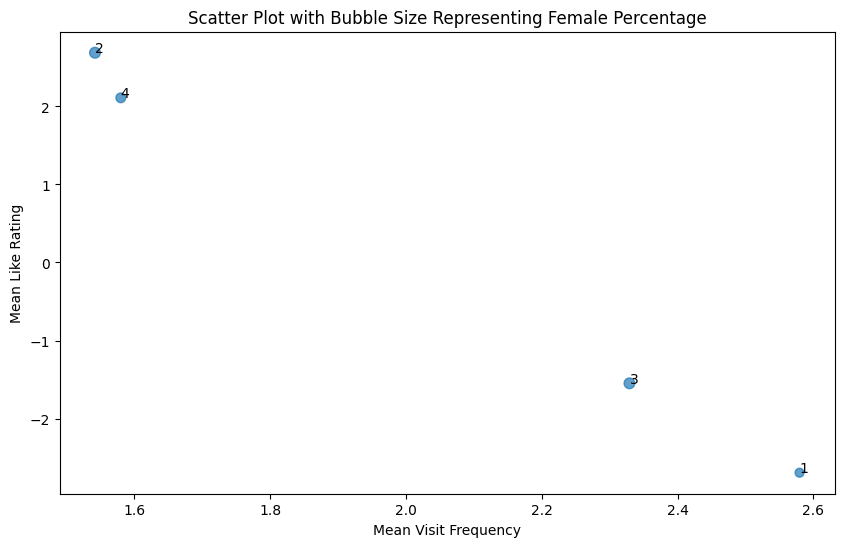

In [66]:
# Scatter plot for clusters wrt mean like rating and mean visiting frequency
visit_means = df_mosaic.groupby('Cluster')['VisitFrequency'].mean()
like_means = df_mosaic.groupby('Cluster')['Like'].mean()
female_means = df_mosaic.groupby('Cluster')['Gender'].mean()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(visit_means, like_means, s=100 * female_means, alpha=0.7)


# Add labels to points
for i, txt in enumerate(range(1, 5)):
    plt.text(visit_means[i], like_means[i], str(txt))

# Add labels and title
plt.xlabel('Mean Visit Frequency')
plt.ylabel('Mean Like Rating')
plt.title('Scatter Plot with Bubble Size Representing Female Percentage')

plt.show()

In [67]:
print(visit_means,
like_means,
female_means)

Cluster
0    2.579646
1    1.542125
2    2.329154
3    1.580110
Name: VisitFrequency, dtype: float64 Cluster
0   -2.694690
1    2.688645
2   -1.548589
3    2.110497
Name: Like, dtype: float64 Cluster
0    0.411504
1    0.602564
2    0.592476
3    0.488950
Name: Gender, dtype: float64
